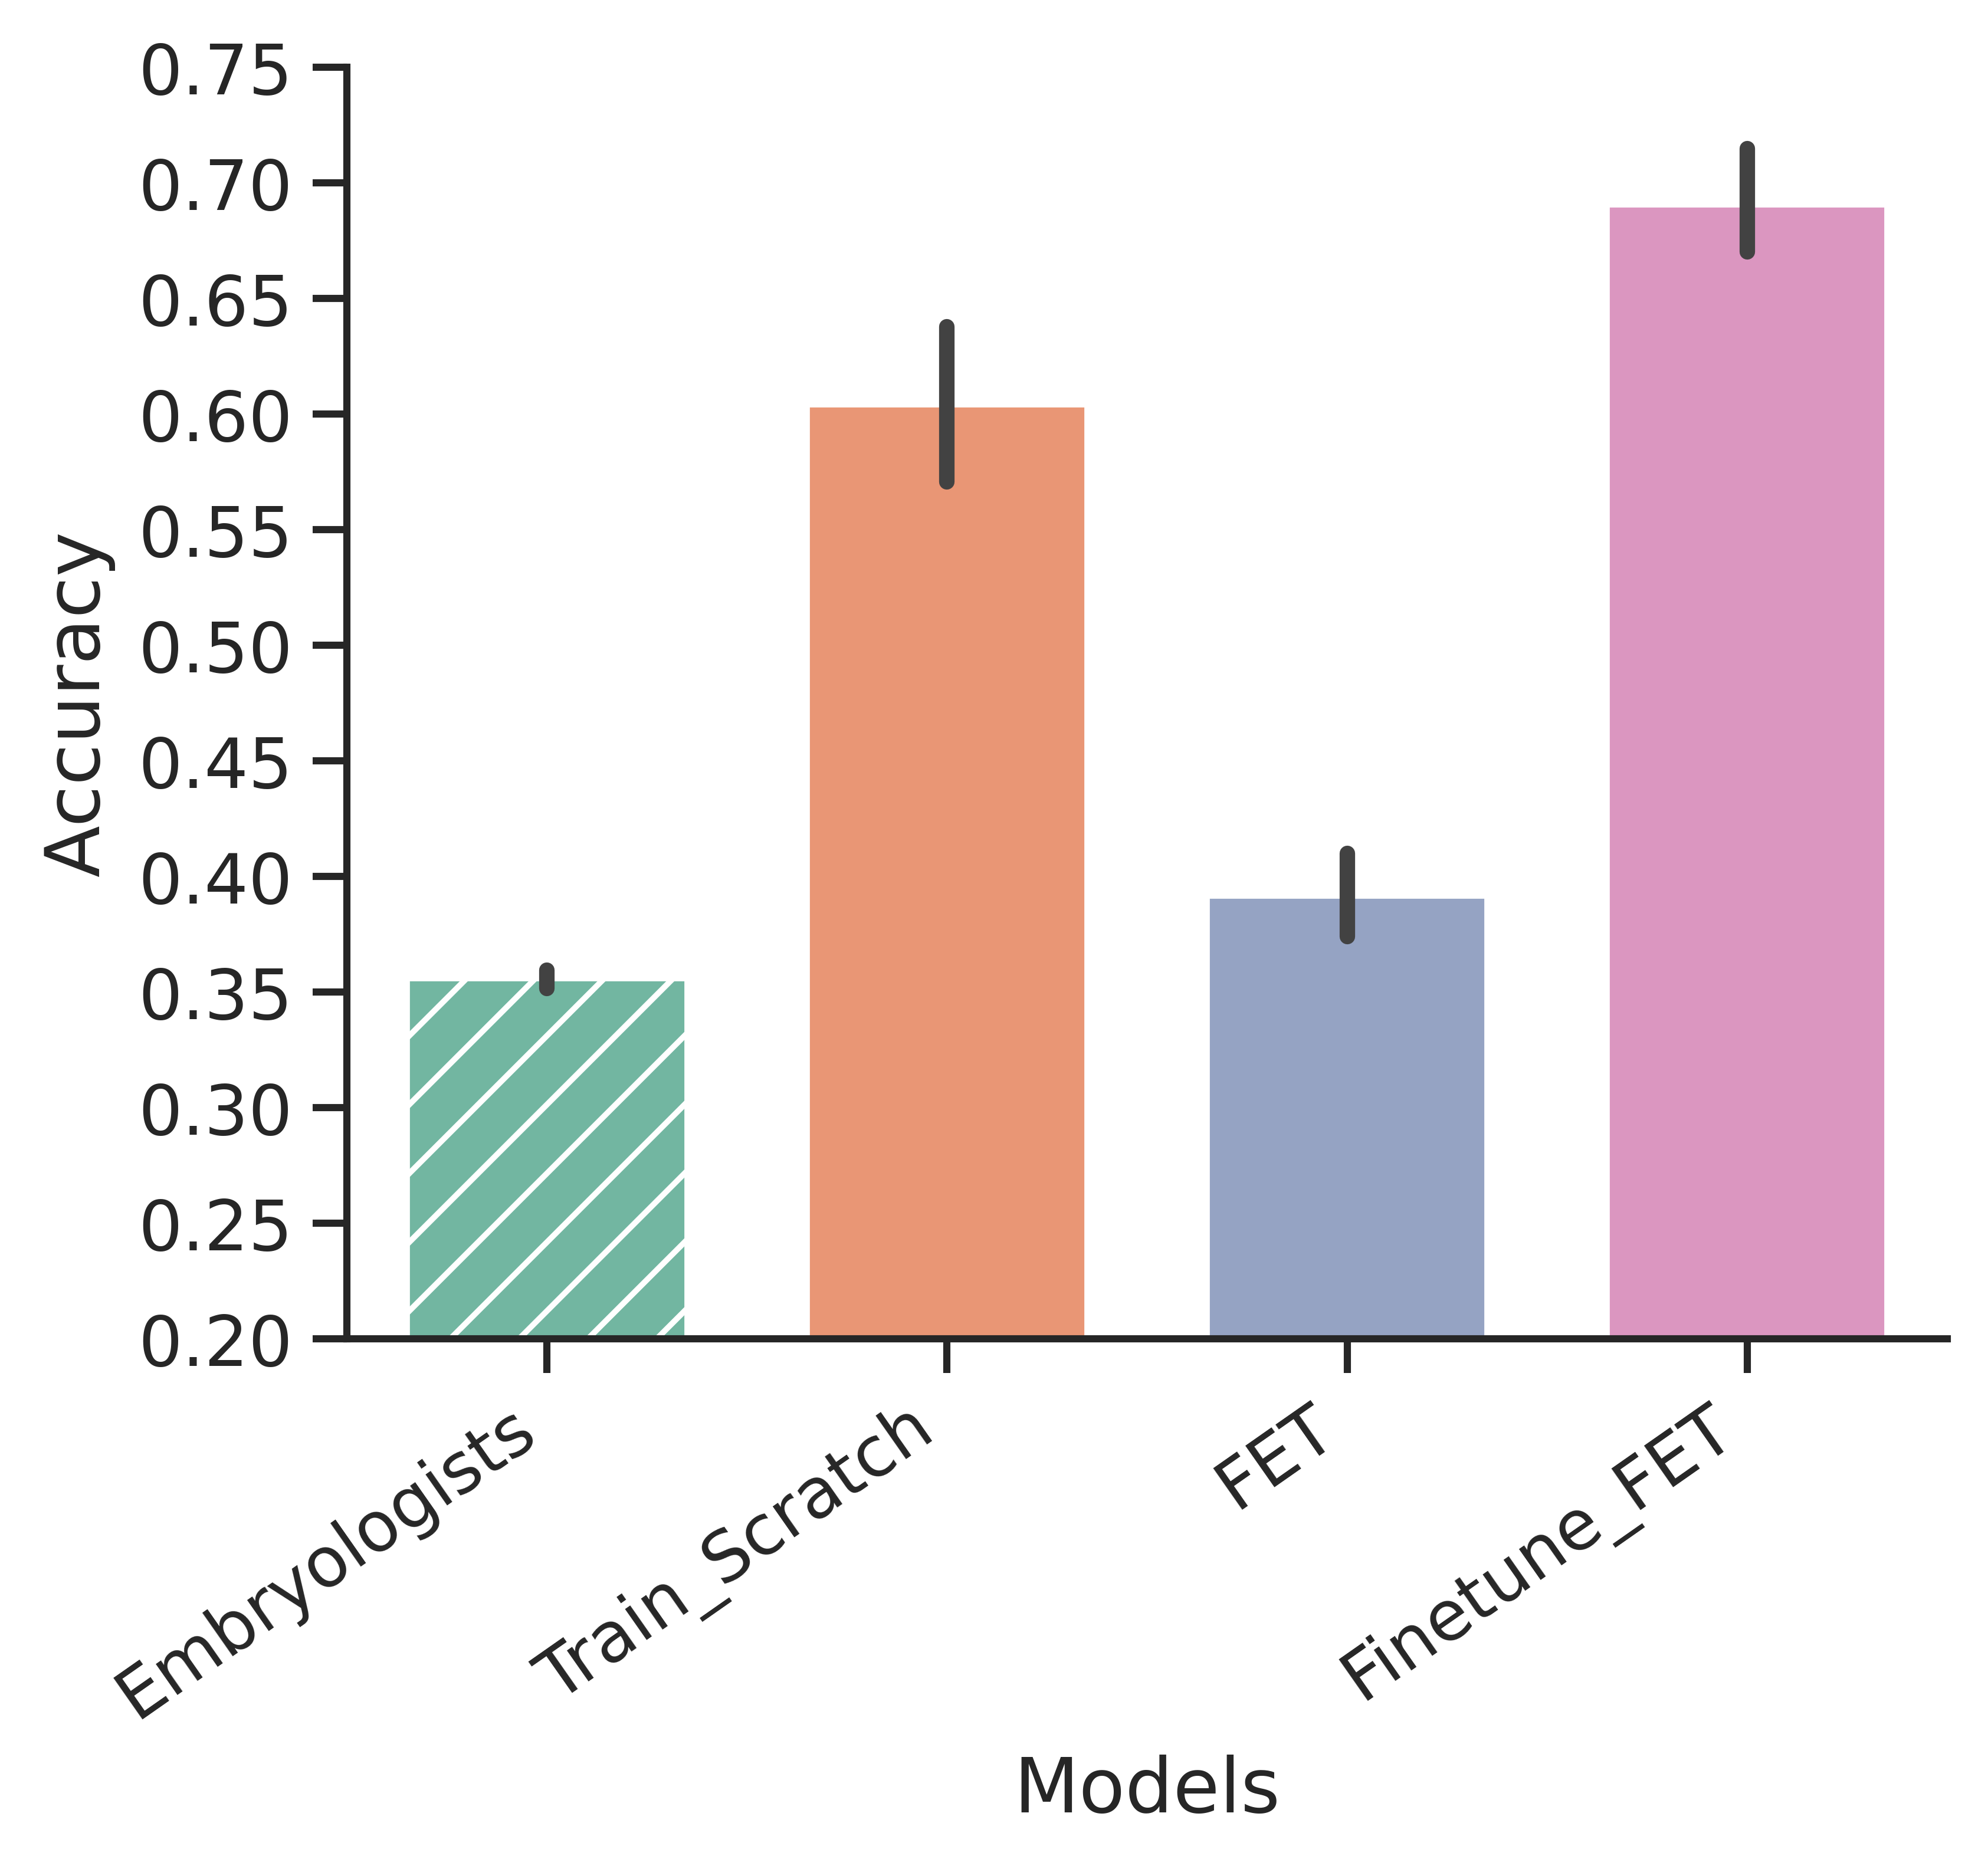

In [5]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve
df = pd.read_csv('/mnt/louisayu/nfs_share2/embryo/code/em_aug/fresh/pregfreacc.csv')
df = df.rename({"Unnamed: 0":"Models"},axis=1)
melt_df = df.melt(id_vars='Models', var_name='fold', value_name='Accuracy')
melt_df['Accuracy']=melt_df['Accuracy'].astype('float')
sns.set_theme(style='ticks', palette='Set2', font_scale=1.1,)
fig2 = plt.figure(figsize=(5,4),dpi=700)       # adjust the canvas size and resolution
ax = fig2.gca()                                # main axes
sns.barplot(data=melt_df, x='Models', y='Accuracy', ax=ax, width=0.7)  # main plotting fun
ax.patches[0].set_hatch('//')
ax.set_ylim(0.2,0.75)    
ax.set_yticks([0.2 + i*0.05 for i in range(12)])           
# plt.title("Fresh Embryo Pregnant Prediction Accuracy")
plt.xticks(rotation=35, ha='right');          # rotate model name
sns.despine(ax=ax)                            # remove axes boundary

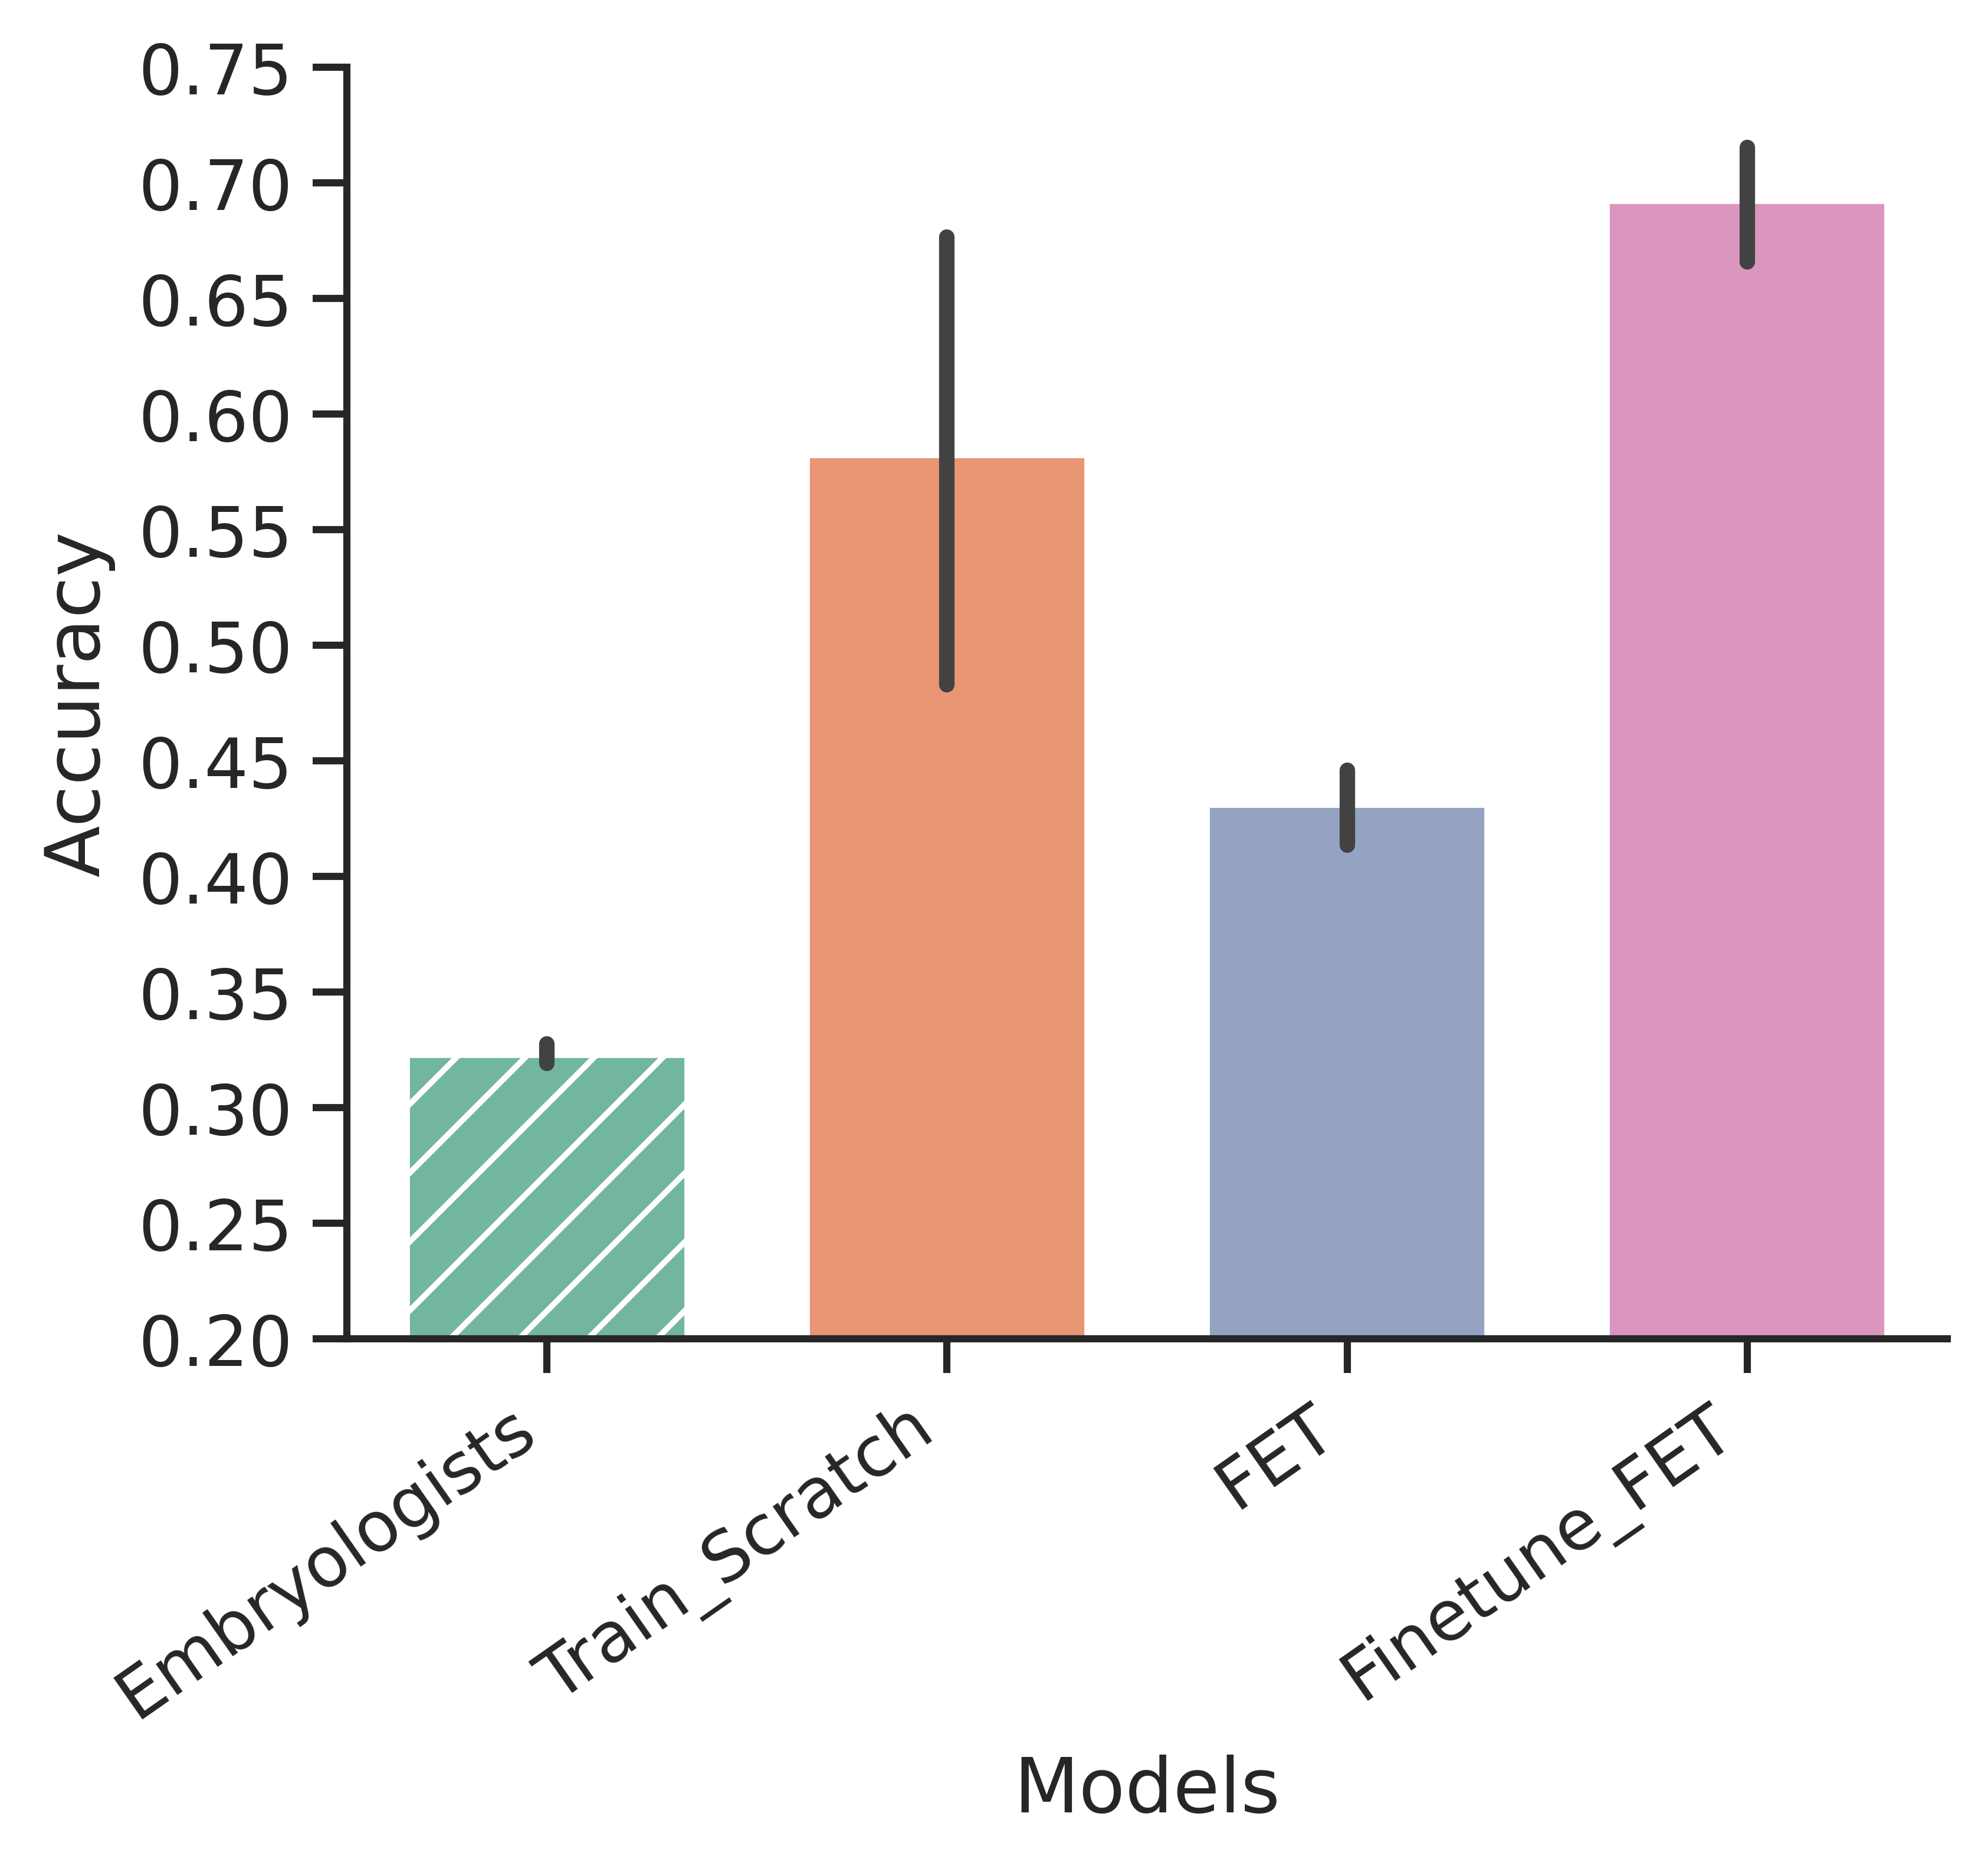

In [6]:
df = pd.read_csv('/mnt/louisayu/nfs_share2/embryo/code/em_aug/fresh/lbfreacc.csv')
df = df.rename({"Unnamed: 0":"Models"},axis=1)
melt_df = df.melt(id_vars='Models', var_name='fold', value_name='Accuracy')
melt_df['Accuracy']=melt_df['Accuracy'].astype('float')
sns.set_theme(style='ticks', palette='Set2', font_scale=1.1,)
fig2 = plt.figure(figsize=(5,4),dpi=700)       # adjust the canvas size and resolution
ax = fig2.gca()                                # main axes
sns.barplot(data=melt_df, x='Models', y='Accuracy', ax=ax, width=0.7)  # main plotting fun
ax.patches[0].set_hatch('//')
ax.set_ylim(0.2,0.75)    
ax.set_yticks([0.2 + i*0.05 for i in range(12)])           
# plt.title("Fresh Embryo Live Birth Prediction Accuracy")
plt.xticks(rotation=35, ha='right');          # rotate model name
sns.despine(ax=ax)                            # remove axes boundary

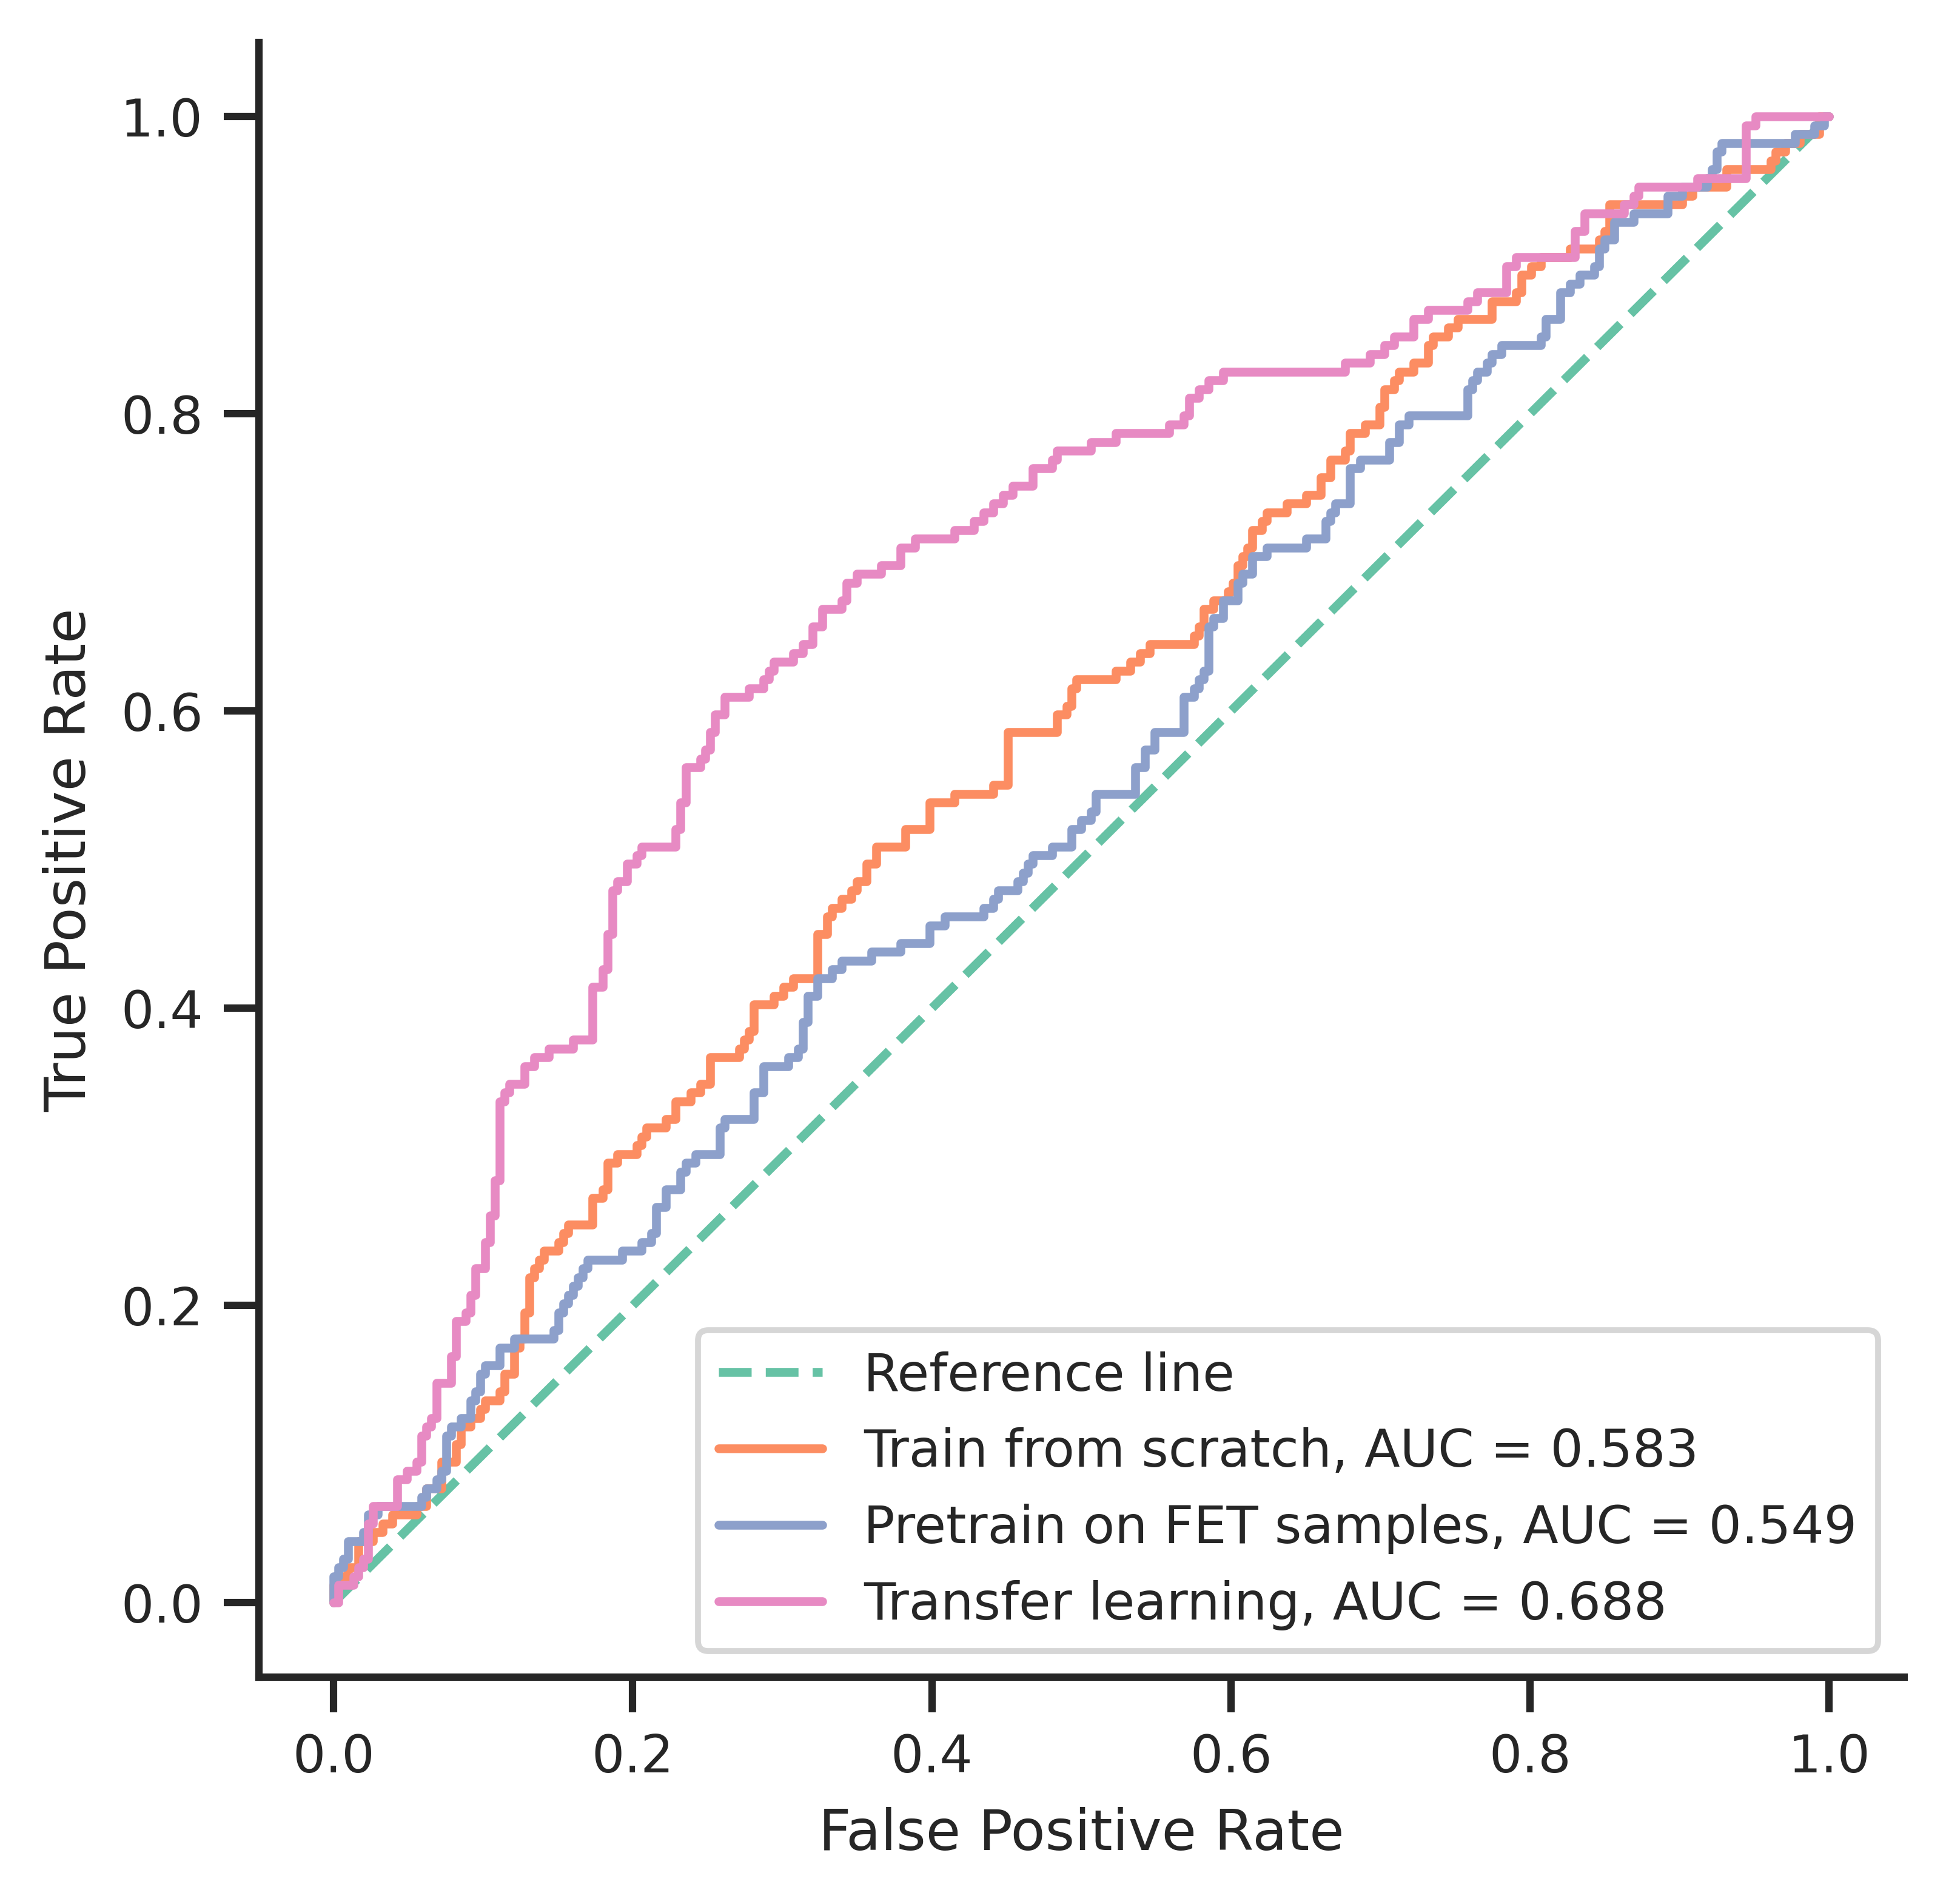

In [41]:
import math
df=pd.read_csv('/mnt/louisayu/nfs_share2/embryo/code/em_aug/fresh/fre.csv')
true=df['truep'].dropna()
pred=df['predp_thaw'].dropna()
pred1=df['predp_pure'].dropna()
pred2=df['predp_ftthaw'].dropna()

fpr, tpr, thresholds = roc_curve(true, pred)
fpr1, tpr1, thresholds = roc_curve(true, pred1)
fpr2, tpr2, thresholds = roc_curve(true, pred2)
sns.set_theme(style='ticks', palette="Set2", font_scale=0.8)

np.random.seed(19680801)
sns.set_style("ticks")
fig = plt.figure(figsize=(5,5),dpi=700)  
ax=fig.gca()
#fig = px.scatter(data, x='threshold', y='paccmf',  color_discrete_sequence=['blue'], opacity=0.8,width=1000, height=800)
xx = np.arange(0, 1, 10)
yy = np.arange(0, 1, 10)
plt.plot([0,1],[0,1], linestyle='--', label='Reference line' )
plt.plot(fpr1, tpr1, label= 'Train from scratch, AUC = '+  str(math.ceil(roc_auc_score(true, pred1)*1000)/1000))
plt.plot(fpr, tpr, label='Pretrain on FET samples, AUC = '+ str(math.ceil(roc_auc_score(true, pred)*1000)/1000))
plt.plot(fpr2, tpr2, label='Transfer learning, AUC = '+  str(math.ceil(roc_auc_score(true, pred2)*1000)/1000))
#, name='Train from scratch, AUC = '+  str(math.ceil(roc_auc_score(true, pred1)*1000)/1000) , line=dict(color='limegreen', width=4)))
sns.despine(ax=ax) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curve within Single Transfer Patients ')
plt.legend(loc="lower right")
plt.show()



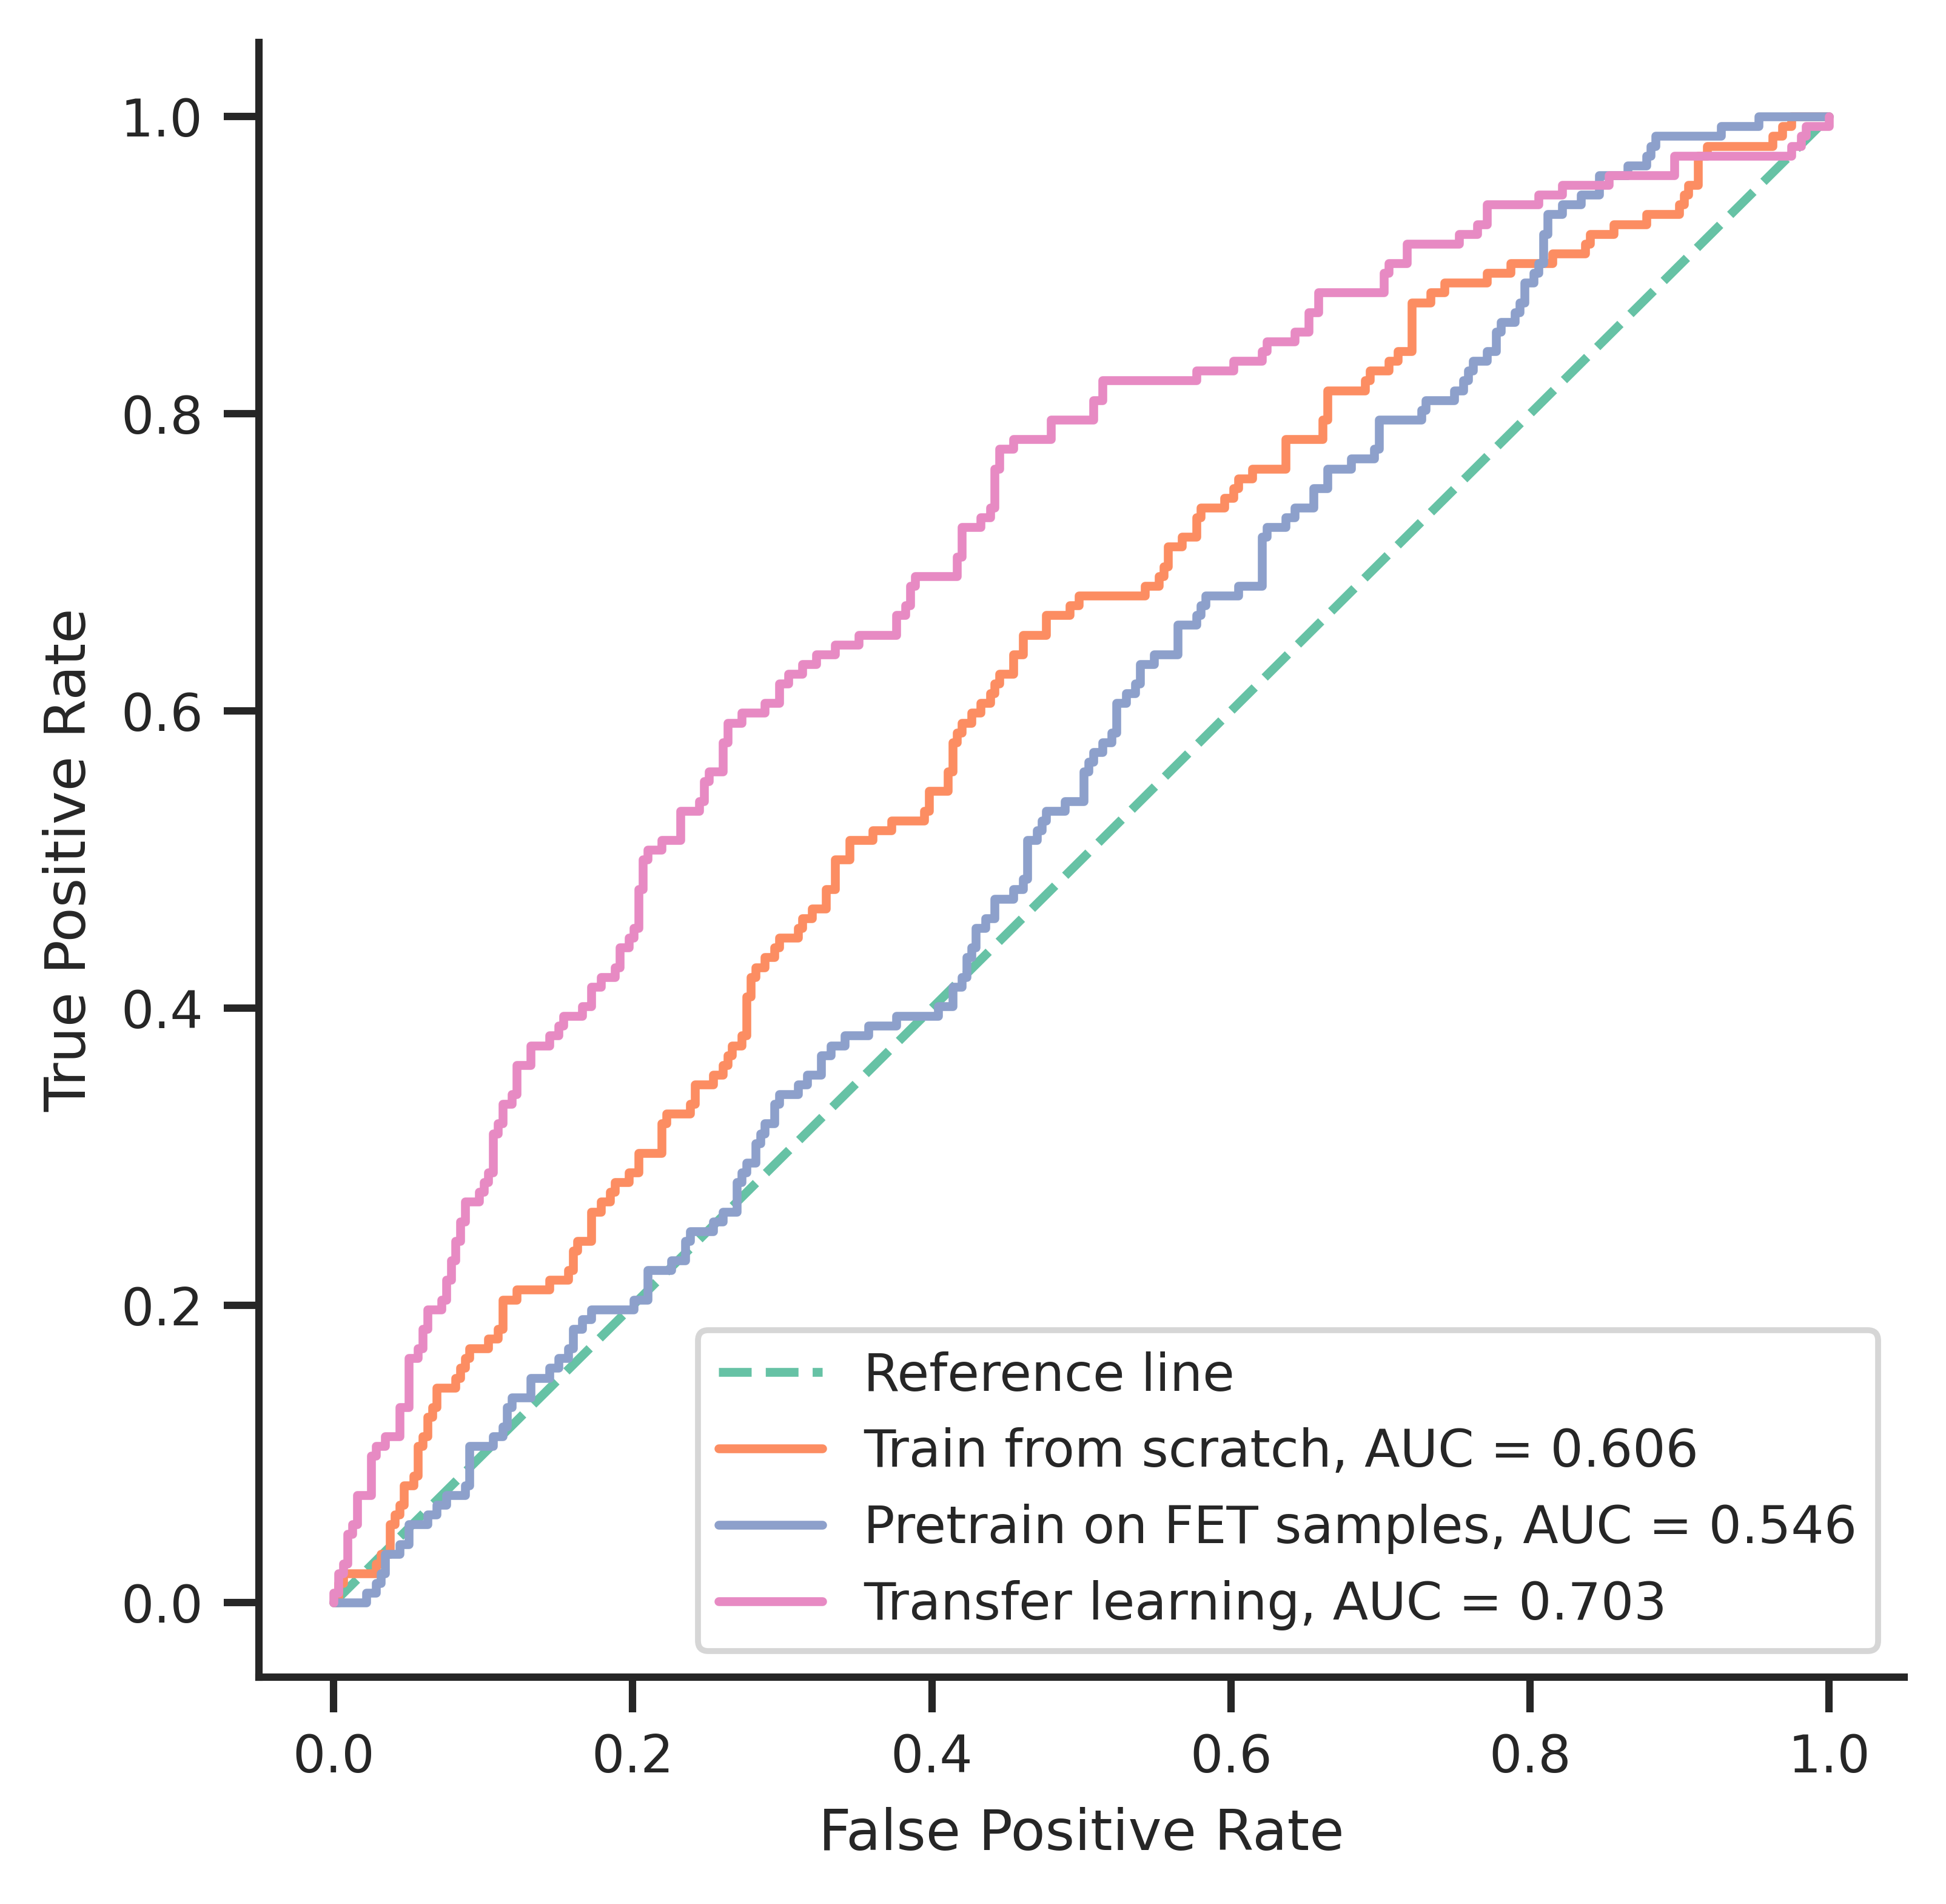

In [42]:
df=pd.read_csv('/mnt/louisayu/nfs_share2/embryo/code/em_aug/fresh/fre.csv')
true=df['truel'].dropna()
pred=df['predl_thaw'].dropna()
pred1=df['predl_pure'].dropna()
pred2=df['predl_ftthaw'].dropna()
fpr, tpr, thresholds = roc_curve(true, pred)
fpr1, tpr1, thresholds = roc_curve(true, pred1)
fpr2, tpr2, thresholds = roc_curve(true, pred2)
fig = plt.figure(figsize=(5,5),dpi=700)  
ax=fig.gca()
plt.plot([0,1],[0,1], linestyle='--', label='Reference line' )
plt.plot(fpr1, tpr1, label= 'Train from scratch, AUC = '+  str(math.ceil(roc_auc_score(true, pred1)*1000)/1000))
plt.plot(fpr, tpr, label='Pretrain on FET samples, AUC = '+ str(math.ceil(roc_auc_score(true, pred)*1000)/1000))
plt.plot(fpr2, tpr2, label='Transfer learning, AUC = '+  str(math.ceil(roc_auc_score(true, pred2)*1000)/1000))
sns.despine(ax=ax) 
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# plt.title('ROC Curve within Single Transfer Patients ')
plt.legend(loc="lower right")
plt.show()

Text(0.5, 1.0, 'Fresh Embryo Live Birth')

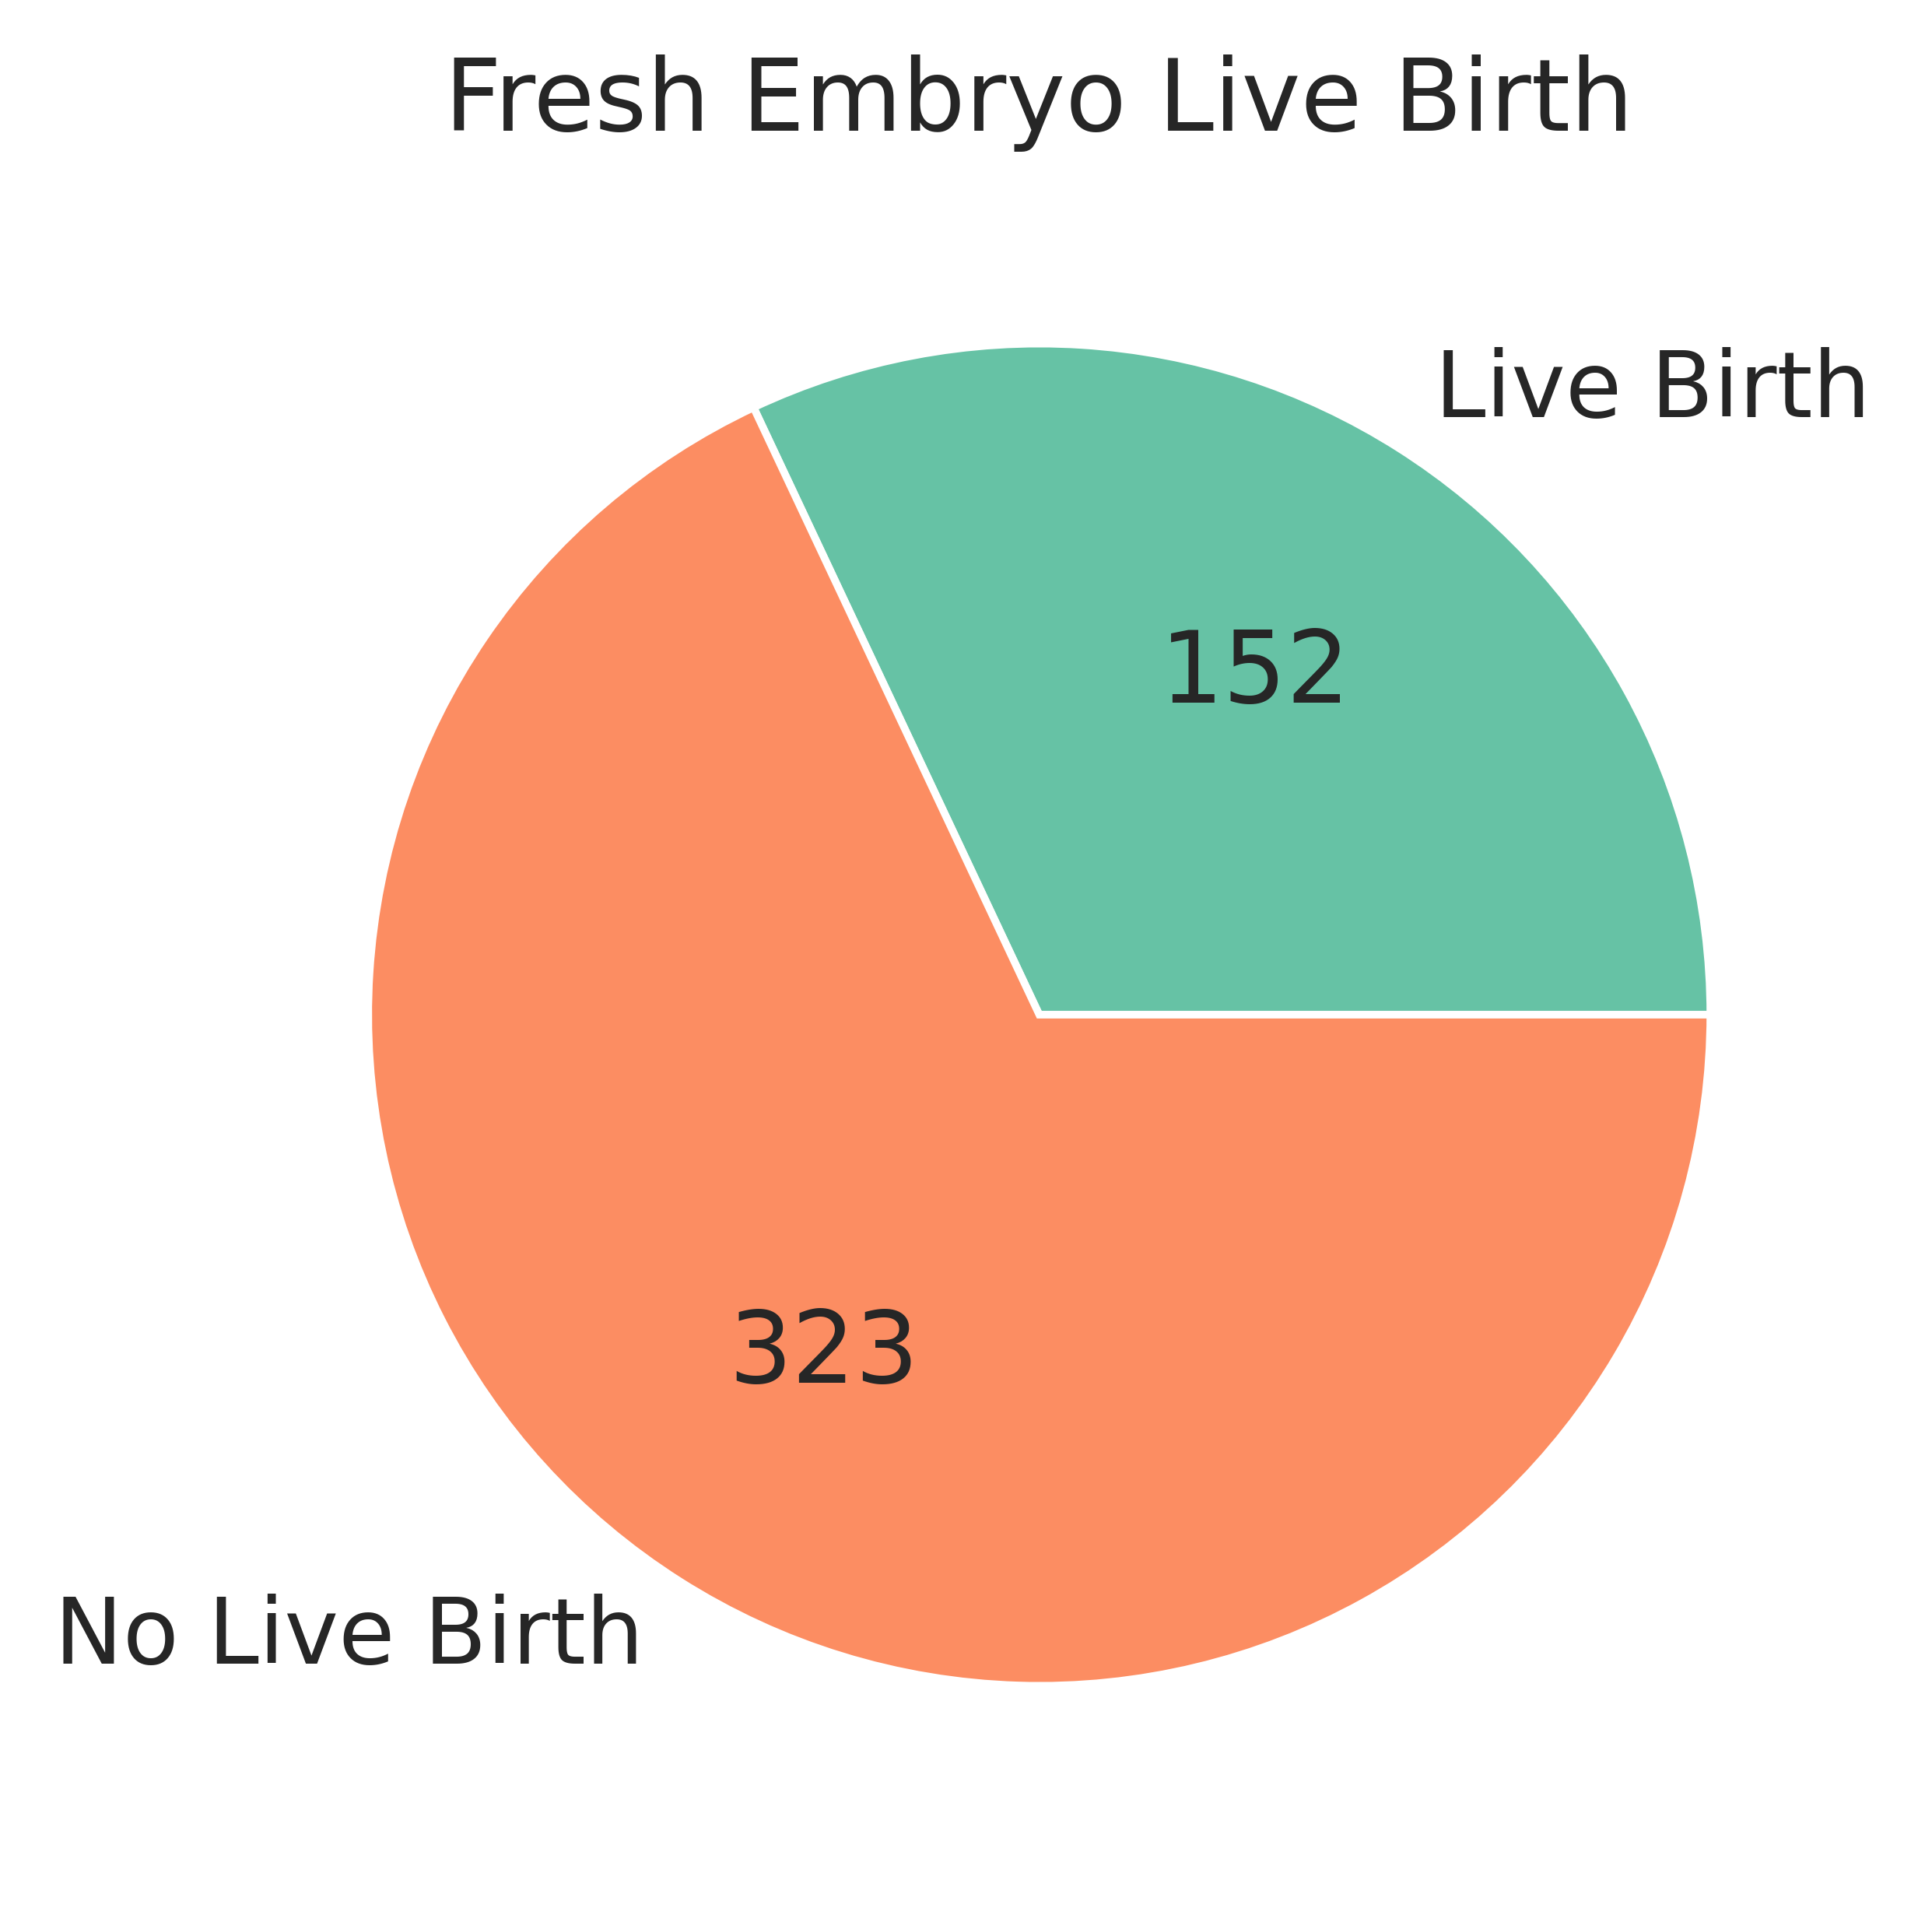

In [33]:
labels = 'Live Birth', 'No Live Birth'
data = [152,323]
total=sum(data)
fig=plt.figure(figsize=(5,4),dpi=700)
ax = fig.gca() 
ax.pie(data, labels=labels,autopct=lambda p: '{:.0f}'.format(p * total / 100))
ax.set_title('Fresh Embryo Live Birth')

Text(0.5, 1.0, 'Fresh Embryo Pregnancy')

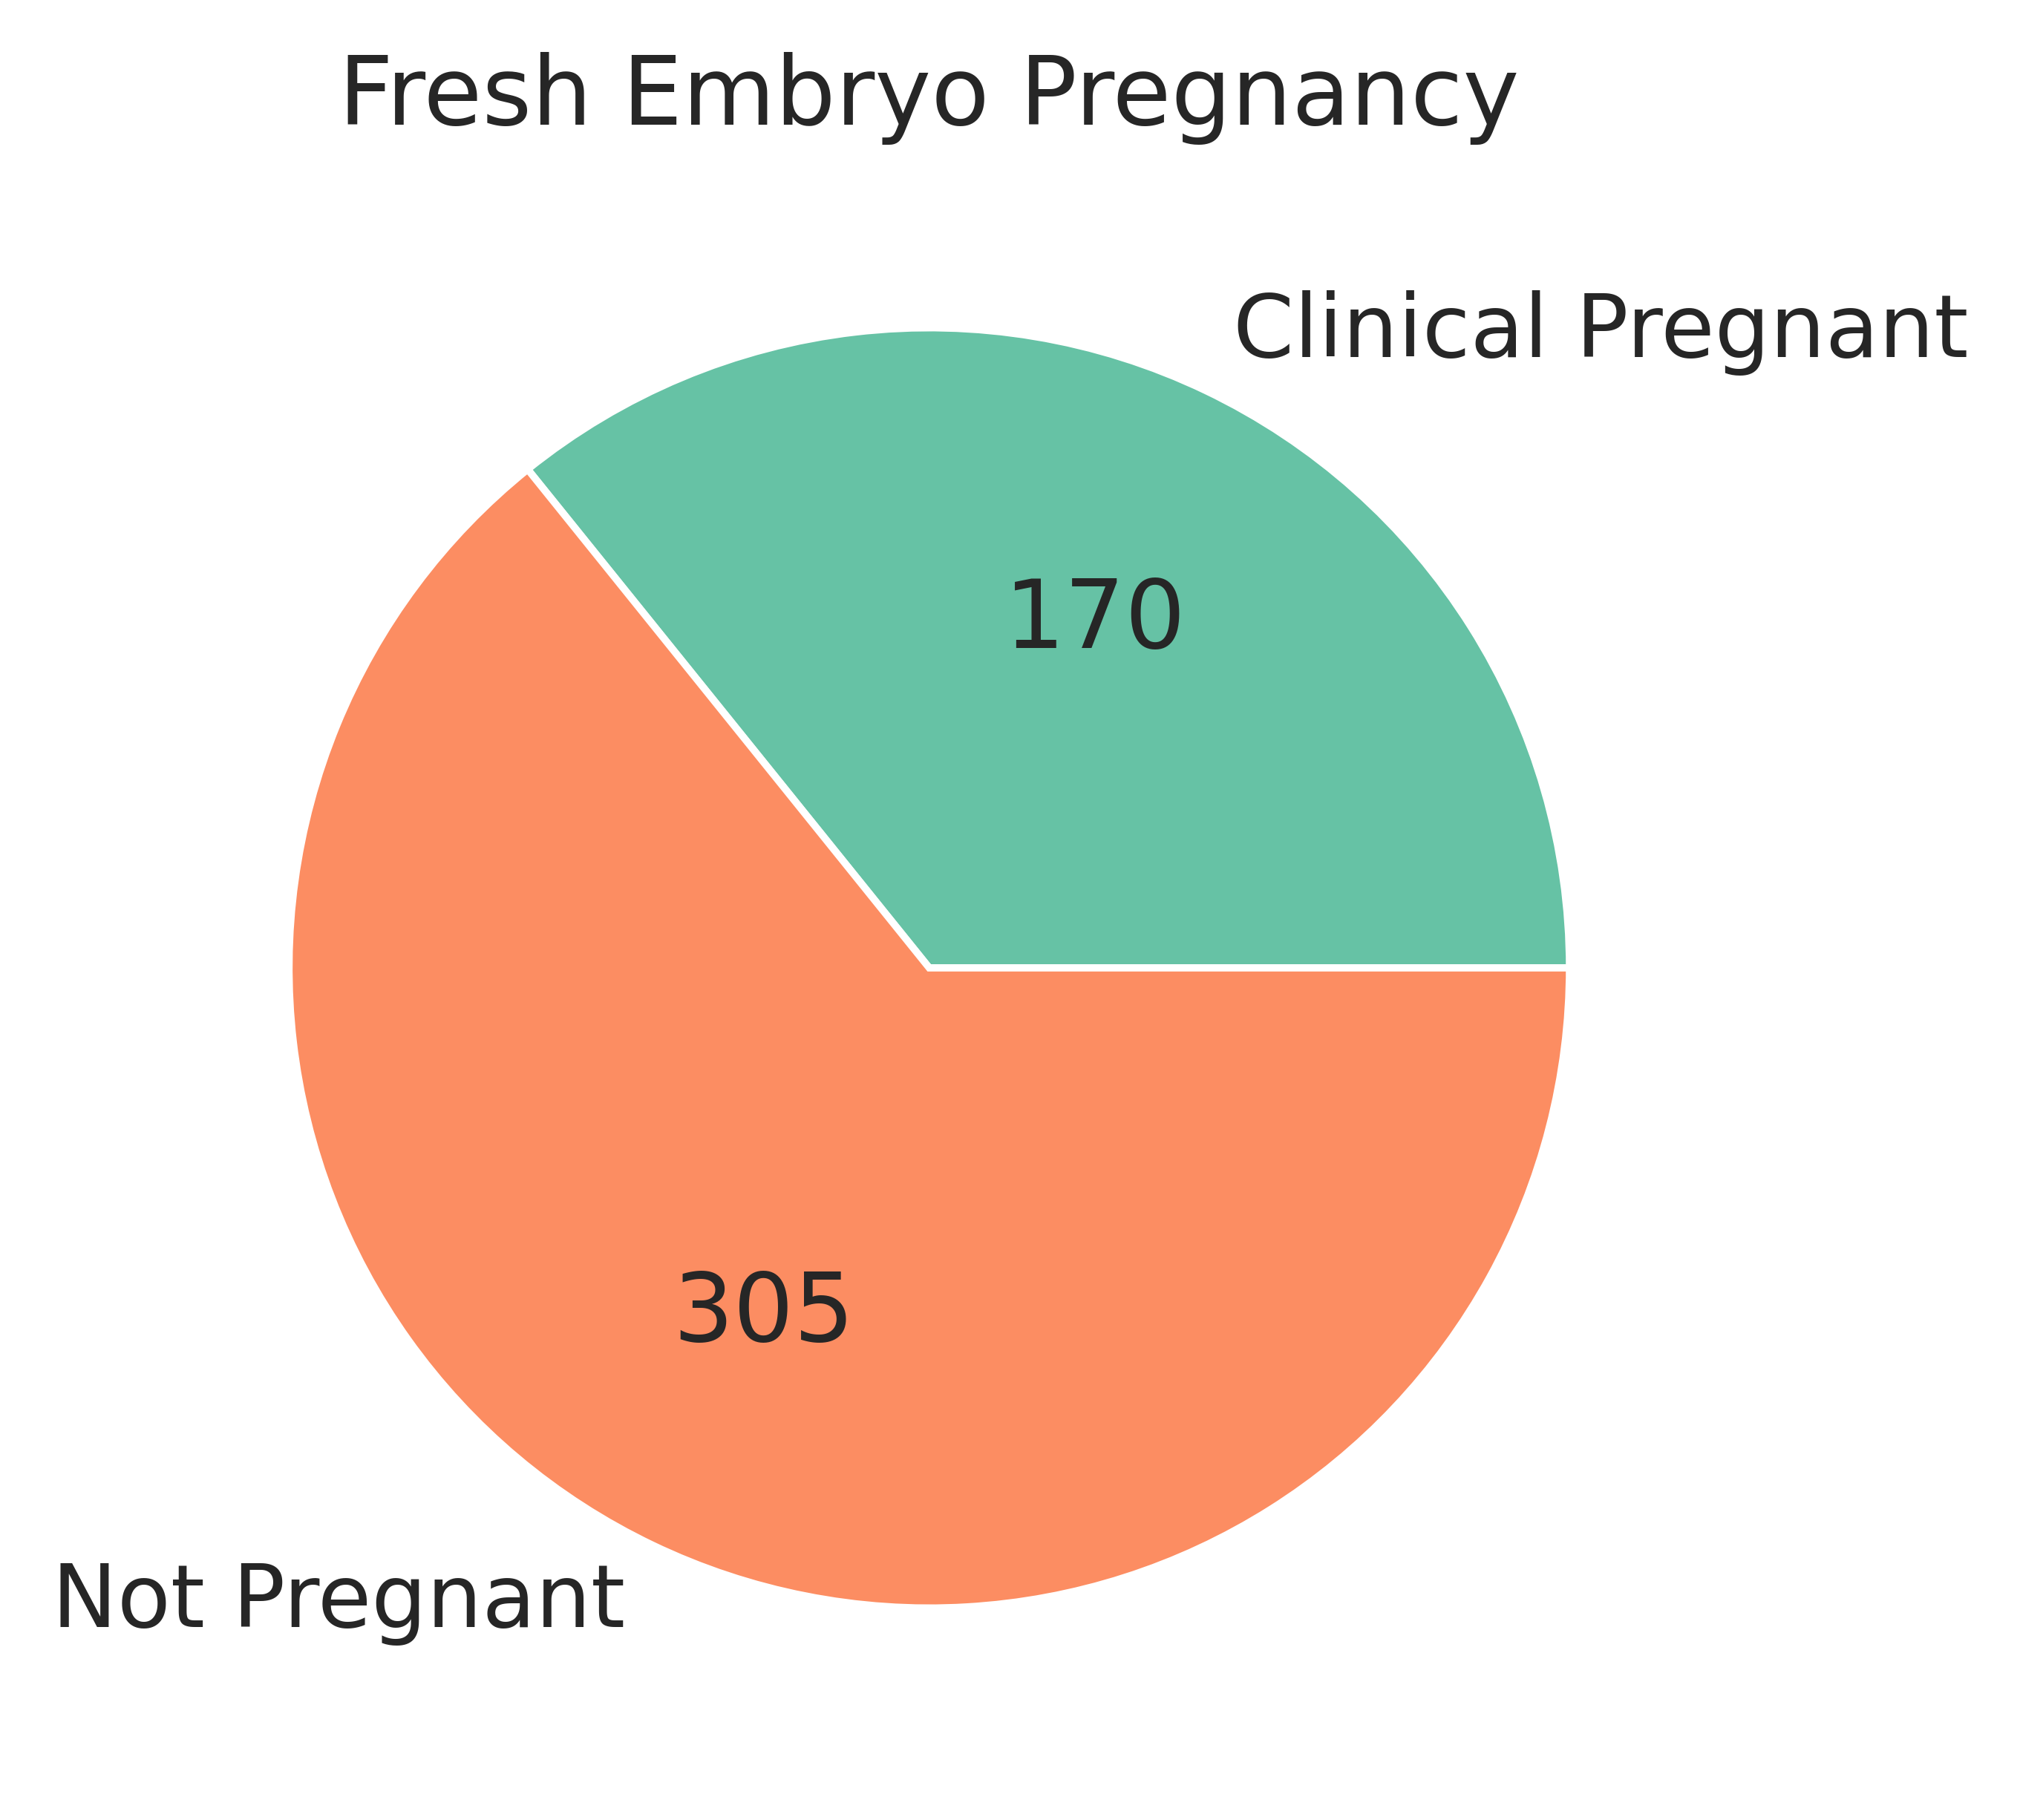

In [32]:
labels = 'Clinical Pregnant', 'Not Pregnant'
data = [170,305]
total=sum(data)
fig=plt.figure(figsize=(5,4),dpi=700) 
ax = fig.gca() 
ax.pie(data, labels=labels,autopct=lambda p: '{:.0f}'.format(p * total / 100))
ax.set_title('Fresh Embryo Pregnancy')
